# **M3_AI1_CONSULTA DE LA EUROSTAT**

- Peredo Mescco, Elizabeth Evelin

In [ ]:
!pip install eurostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import yaml
from google.colab import drive
from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials

import eurostat
from eurostat import get_data_df

## 1. Crea una variable string con la url de la llamada al api de Eurostat para obtener los datos del colectivo objetivo del estudio. Ejemplo: urlEUROSTAT =https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/XXX......

In [ ]:
url_euro="https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/ilc_pw01?format=JSON"
result=json.load(urlopen(url_euro))

## 2. Crea un diccionario con el objeto JSON que se obtiene al realizar la petición a la API de la consulta del punto anterior. Imprime por pantalla el elemento "dimension" del diccionario creado.
- Puedes utilizar la función urlopen() de la librería urllib.request.

In [ ]:
data=json.load(urlopen(url_euro))
print(yaml.dump(data["dimension"], sort_keys=False, default_flow_style=False))


freq:
  label: Time frequency
  category:
    index:
      A: 0
    label:
      A: Annual
unit:
  label: Unit of measure
  category:
    index:
      RTG: 0
    label:
      RTG: Rating (0-10)
isced11:
  label: International Standard Classification of Education (ISCED 2011)
  category:
    index:
      TOTAL: 0
      ED0-2: 1
      ED3_4: 2
      ED5-8: 3
      ED5_6: 4
    label:
      TOTAL: All ISCED 2011 levels
      ED0-2: Less than primary, primary and lower secondary education (levels 0-2)
      ED3_4: Upper secondary and post-secondary non-tertiary education (levels 3 and
        4)
      ED5-8: Tertiary education (levels 5-8)
      ED5_6: Short-cycle tertiary education and Bachelor's or equivalent level (levels
        5 and 6)
indic_wb:
  label: Personnal well-being indicators
  category:
    index:
      FINSAT: 0
      ACCSAT: 1
      JOBSAT: 2
      COMSAT: 3
      TIMESAT: 4
      LIFESAT: 5
      GREENSAT: 6
      LIVENVSAT: 7
      RELSAT: 8
      MEANLIFE: 9
    label

## 3. Descarga los datos de Satisfacción en Europa (código del dataset: ilc_pw01) en formato pandas a partir de la función get_data_df() de librería eurostat.
- Para instalar la librería Eurostat ejecuta en colab: !pip install eurostat

In [ ]:
database = 'ilc_pw01'
df = eurostat.get_data_df(database)
print(df)

      freq unit isced11 indic_wb sex     age geo\TIME_PERIOD  2013  2018  2021
0        A  RTG   ED0-2   ACCSAT   F  Y16-19              AT   8.7   NaN   NaN
1        A  RTG   ED0-2   ACCSAT   F  Y16-19              BE   8.0   NaN   NaN
2        A  RTG   ED0-2   ACCSAT   F  Y16-19              BG   6.0   NaN   NaN
3        A  RTG   ED0-2   ACCSAT   F  Y16-19              CH   8.5   NaN   NaN
4        A  RTG   ED0-2   ACCSAT   F  Y16-19              CY   8.3   NaN   NaN
...    ...  ...     ...      ...  ..     ...             ...   ...   ...   ...
63856    A  RTG   TOTAL  TIMESAT   T  Y_GE75              SI   7.1   8.0   NaN
63857    A  RTG   TOTAL  TIMESAT   T  Y_GE75              SK   7.9   7.4   NaN
63858    A  RTG   TOTAL  TIMESAT   T  Y_GE75              TR   5.5   5.9   NaN
63859    A  RTG   TOTAL  TIMESAT   T  Y_GE75              UK   8.1   8.4   NaN
63860    A  RTG   TOTAL  TIMESAT   T  Y_GE75              XK   NaN   6.4   NaN

[63861 rows x 10 columns]


## 4. Filtra el conjunto de datos solicitados en el punto 1 directamente en este Data Frame y presenta las 6 primeras filas.

El colectivo objetivo del estudio es:
- Nivel de educación (isced11): Tertiary education ED5-8
- Indicador (indic_wb):   JOBSAT
- Género (sex): T – Total
- Edad (age): Y25-34 – From 25 to 34 years

In [ ]:
df_new = df.loc[(df['isced11'] == 'ED5-8') & 
                     (df['indic_wb'] == 'JOBSAT') & 
                     (df['sex'] == 'T') & 
                     (df['age'] == 'Y25-34')]
df_new.head(6)

,freq,unit,isced11,indic_wb,sex,age,geo\TIME_PERIOD,2013,2018,2021
38077,A,RTG,ED5-8,JOBSAT,T,Y25-34,AL,NaN,6.5,NaN
38078,A,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.1,8.0,NaN
38079,A,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.4,7.6,NaN
38080,A,RTG,ED5-8,JOBSAT,T,Y25-34,BG,6.9,7.0,NaN
38081,A,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.6,7.5,NaN
38082,A,RTG,ED5-8,JOBSAT,T,Y25-34,CY,7.4,7.4,NaN


## 5. Construye un gráfico donde se presente el nivel de satisfacción en cada país del colectivo objetivo del estudio en el año 2018.:

In [ ]:
df_satf = pd.pivot_table(df, values='2018', 
                         index='geo\\TIME_PERIOD', 
                         columns='indic_wb', 
                         aggfunc='mean')
df_satf.head(5)

indic_wb,FINSAT,JOBSAT,LIFESAT,RELSAT,TIMESAT
geo\TIME_PERIOD,,,,,
AL,4.920261,5.348837,5.598039,6.952288,5.750980
AT,7.322876,8.018919,8.015789,8.635294,7.454902
BE,7.000654,7.579091,7.637255,7.973856,7.160784
BG,4.219595,6.270833,5.554730,6.700000,5.865541
CH,7.116340,8.051200,7.966225,8.690728,7.511921


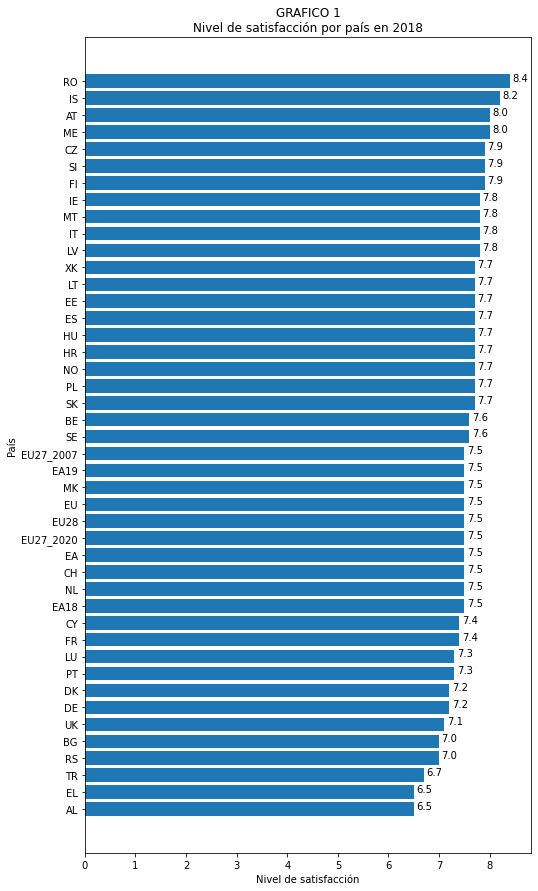

In [ ]:
df_new_18 = df_new[['geo\\TIME_PERIOD', '2018']]
df_new_18 = df_new_18.sort_values(by='2018')

fig, ax = plt.subplots(figsize=(8,15))
ax.barh(df_new_18['geo\\TIME_PERIOD'], df_new_18['2018'])
ax.set_xlabel('Nivel de satisfacción')
ax.set_ylabel('País')
ax.set_title('''GRAFICO 1
Nivel de satisfacción por país en 2018''')

for i, v in enumerate(df_new_18['2018']):
    ax.text(v + 0.05, i , str(v), color='black', fontsize=10)

plt.show()

El gráfico (GRÁFICO 1) precedente evidencia que el minimo valor de satisfacción es 6.5 y el máximo valor de satisfacción es 8.4 ambos en una escala de 1 al 10. Con respecto a la UE27-2020 evidencia un promedio de 7.5 de los paises que conforman este, esto refleja que la satisfacción de los trabajadores es satisfactorio.

## 6. ¿En qué país están más satisfechos con el trabajo en 2018? ¿En qué país están menos satisfechos?

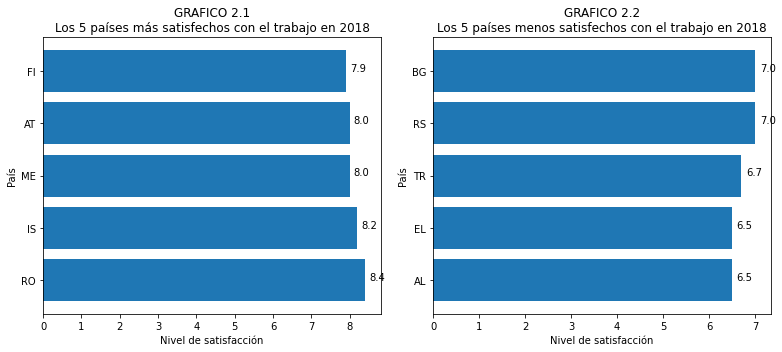

In [ ]:
df_top5 = df_new_18.nlargest(5, columns='2018')
df_bottom5 = df_new_18.nsmallest(5, columns='2018')

fig, axs = plt.subplots(1, 2, figsize=(11, 5))

axs[0].barh(df_top5['geo\TIME_PERIOD'], df_top5['2018'])
axs[0].set_xlabel('Nivel de satisfacción')
axs[0].set_ylabel('País')
axs[0].set_title('''GRAFICO 2.1
Los 5 países más satisfechos con el trabajo en 2018''')

axs[1].barh(df_bottom5['geo\TIME_PERIOD'], df_bottom5['2018'])
axs[1].set_xlabel('Nivel de satisfacción')
axs[1].set_ylabel('País')
axs[1].set_title('''GRAFICO 2.2
Los 5 países menos satisfechos con el trabajo en 2018''')

for i, v in enumerate(df_top5['2018']):
    axs[0].text(v + 0.1, i, str(v), color='black')
for i, v in enumerate(df_bottom5['2018']):
    axs[1].text(v + 0.1, i, str(v), color='black')
    
plt.tight_layout()
plt.show()

- Según el gráfico precedente (GRÁFICO 2.1) el pais con mayor satisfacción es Rumania, con una aceptación de 8.4 en la escala de 1 al 10.
- El GRAFICO 2.2 evidencia que el pais con menor satisfacción existe un empate entre Albania (AL) y Grecia (EL) con 6.5 de aceptación, en una escala de 1 al 10.